## The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models

## Importing necessary libraries

In [80]:

import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv(r"C:\Users\yavar\DS_Assignments\22.Simple Linear Regression\Salary_data.csv")


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [208]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [210]:
df.rename(columns={'YearsExperience':'ye','Salary':'sa'}, inplace=True)

In [211]:
df.isnull().sum()

ye    0
sa    0
dtype: int64

## Box plot, Scatter plot and Skewness

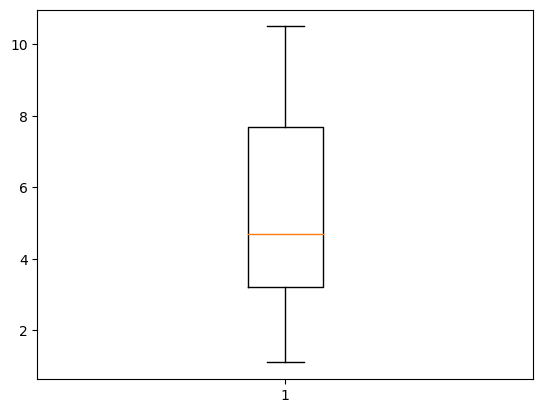

In [213]:
plt.boxplot(df['ye']);

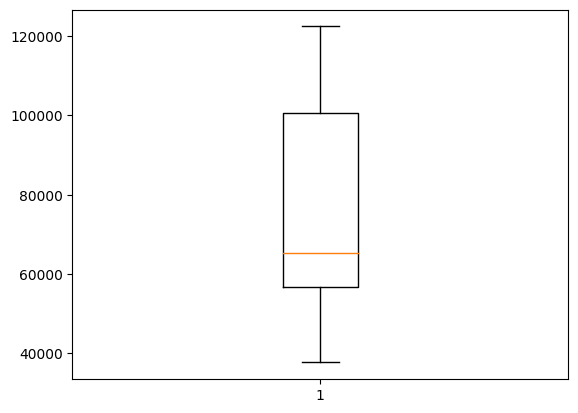

In [214]:
plt.boxplot(df['sa']);

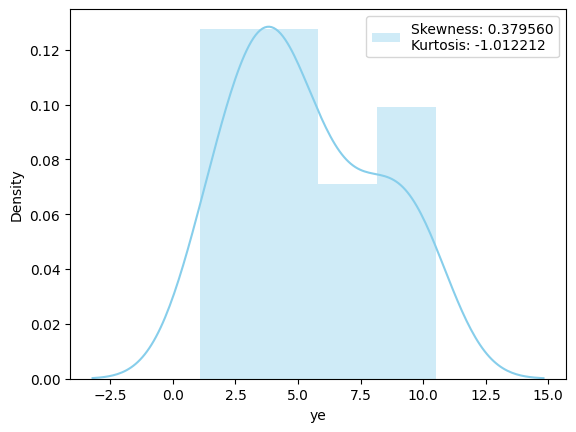

In [215]:
sns.distplot( df['ye'] , color="skyblue",label = "Skewness: %f" % df['ye'].skew() + "\n" + "Kurtosis: %f" % df['ye'].kurt())
plt.legend();

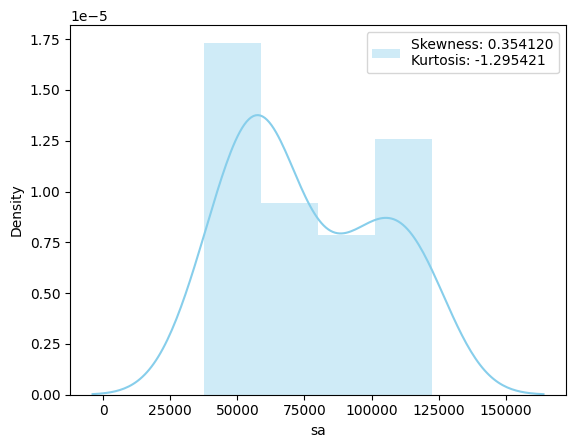

In [217]:
sns.distplot( df['sa'] , color="skyblue",label = "Skewness: %f" % df['sa'].skew() + "\n" + "Kurtosis: %f" % df['sa'].kurt())
plt.legend();


In [218]:
corre = np.corrcoef(df['ye'],df['sa'])
print(corre)

[[1.         0.97824162]
 [0.97824162 1.        ]]


In [219]:
cov = np.cov(df['ye'],df['sa'])
print(cov)

[[8.05360920e+00 7.61063034e+04]
 [7.61063034e+04 7.51550960e+08]]


# Simple Linear Regression 

In [220]:
x=np.array(df.ye).reshape(-1,1)
y=np.array(df.sa).reshape(-1,1)

In [221]:
model = LinearRegression()
model.fit(x,y)

print(model.score(x, y))

0.9569566641435086


In [222]:
pred1= model.predict(pd.DataFrame(df['ye']))

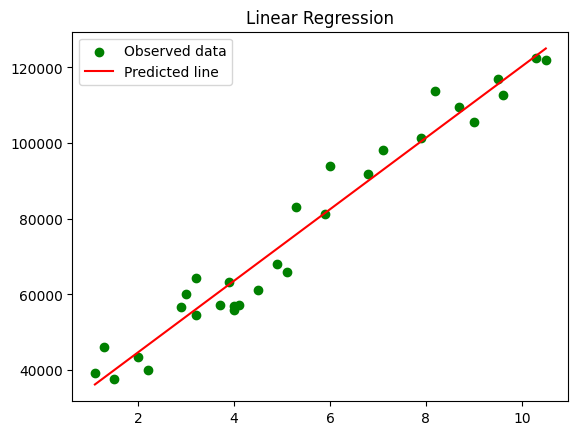

In [223]:
# plt.scatter(df['dt'],df['st']);
plt.scatter(x,y, color = 'green')
plt.plot(df.ye,pred1,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [224]:
regression_model_mse = mean_squared_error(x,y)

MSE = math.sqrt(regression_model_mse)
print("MSE             : ", MSE)
Rsqr = model.score(x,y)
print("R squared value :",Rsqr)

MSE             :  80634.98316084652
R squared value : 0.9569566641435086


In [225]:
print("Coefficient b0 :",model.coef_[0])
print("Intercept b1   :",model.intercept_[0])

Coefficient b0 : [9449.96232146]
Intercept b1   : 25792.20019866871


In [226]:
y_predicted = model.predict(x)
y_actual = y
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

print(rmse(y_predicted,y_actual))

5592.043608760662


In [242]:
import statsmodels.formula.api as smf

model1 = smf.ols('sa ~ ye',data = df).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sa   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        12:17:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applied log for x variable


In [229]:
df["ye_log"]=np.log(df['ye'])

In [231]:
model2 = smf.ols("sa~ye_log",data= df).fit()

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sa   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        11:35:53   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
ye_log      4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
corre = np.corrcoef(df['ye_log'],df['sa'])
print(corre)

[[1.         0.92406108]
 [0.92406108 1.        ]]


In [233]:
pred2= model2.predict(df['ye_log'])

In [234]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

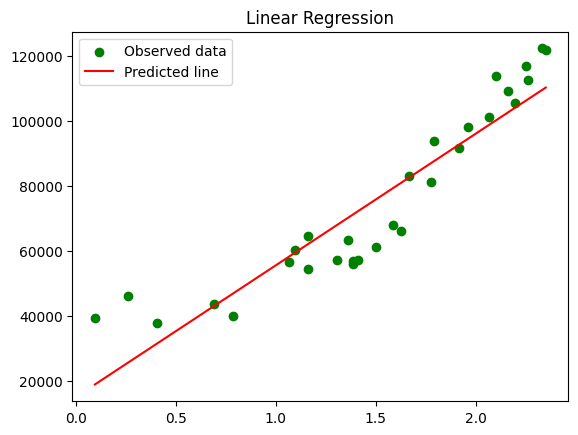

In [235]:

plt.scatter(df.ye_log,y, color = 'green')
plt.plot(df.ye_log,pred2,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

## Observed sligh variation in the r^2 values and Correlation and # Applying log function to Target Variabvle.

In [237]:
df['sa_log']=np.log(df['sa'])

In [238]:
corre = np.corrcoef(df['ye'],df['sa_log'])
print(corre)

[[1.         0.96538444]
 [0.96538444 1.        ]]


In [239]:
model3 = smf.ols("sa_log~ye",data= df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sa_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           7.03e-18
Time:                        12:15:21   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
ye             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
corre = np.corrcoef(df['ye_log'],df['sa_log'])
print(corre)

[[1.         0.95142791]
 [0.95142791 1.        ]]


In [241]:
model4 = smf.ols("sa_log~ye_log",data= df).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sa_log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        12:16:10   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
ye_log         0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Model1 has the best value of R2 value and p values.
